In [13]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hapiness= pd.read_csv("hapiness.csv")
hapiness.columns= ['Country','Region','Hapiness_rank','Hapiness_Score','Standard Error','Economy','Family','Health','Freedom','Trust','Generosity','Dystopia']

In [3]:
hapiness.head()

,Country,Region,Hapiness_rank,Hapiness_Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
hapiness.describe()

,Hapiness_rank,Hapiness_Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
hapiness.skew

<bound method DataFrame.skew of          Country                           Region  Hapiness_rank  \
0    Switzerland                   Western Europe              1   
1        Iceland                   Western Europe              2   
2        Denmark                   Western Europe              3   
3         Norway                   Western Europe              4   
4         Canada                    North America              5   
..           ...                              ...            ...   
153       Rwanda               Sub-Saharan Africa            154   
154        Benin               Sub-Saharan Africa            155   
155        Syria  Middle East and Northern Africa            156   
156      Burundi               Sub-Saharan Africa            157   
157         Togo               Sub-Saharan Africa            158   

     Hapiness_Score  Standard Error  Economy   Family   Health  Freedom  \
0             7.587         0.03411  1.39651  1.34951  0.94143  0.66557   
1

In [6]:
hapiness.columns

Index(['Country', 'Region', 'Hapiness_rank', 'Hapiness_Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia'],
      dtype='object')

In [7]:
hapiness.keys

<bound method NDFrame.keys of          Country                           Region  Hapiness_rank  \
0    Switzerland                   Western Europe              1   
1        Iceland                   Western Europe              2   
2        Denmark                   Western Europe              3   
3         Norway                   Western Europe              4   
4         Canada                    North America              5   
..           ...                              ...            ...   
153       Rwanda               Sub-Saharan Africa            154   
154        Benin               Sub-Saharan Africa            155   
155        Syria  Middle East and Northern Africa            156   
156      Burundi               Sub-Saharan Africa            157   
157         Togo               Sub-Saharan Africa            158   

     Hapiness_Score  Standard Error  Economy   Family   Health  Freedom  \
0             7.587         0.03411  1.39651  1.34951  0.94143  0.66557   
1  

In [8]:
hapiness.shape

(158, 12)

In [10]:
hapiness.dtypes

Country            object
Region             object
Hapiness_rank       int64
Hapiness_Score    float64
Standard Error    float64
Economy           float64
Family            float64
Health            float64
Freedom           float64
Trust             float64
Generosity        float64
Dystopia          float64
dtype: object

In [11]:
hapiness.isnull().sum()

Country           0
Region            0
Hapiness_rank     0
Hapiness_Score    0
Standard Error    0
Economy           0
Family            0
Health            0
Freedom           0
Trust             0
Generosity        0
Dystopia          0
dtype: int64

<AxesSubplot:>

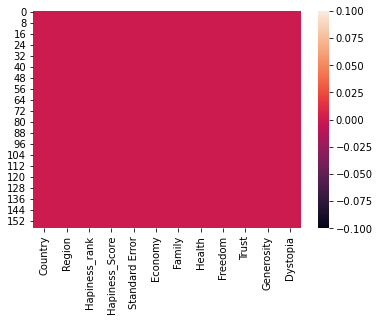

In [14]:
sns.heatmap(hapiness.isnull())

Hapiness_rank        AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Hapiness_Score    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Standard Error    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Economy           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Family            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Health            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Freedom           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Trust                   AxesSubplot(0.125,0.125;0.0945122x0.343182)
Generosity           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Dystopia             AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

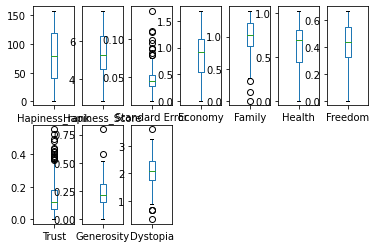

In [16]:
hapiness.plot(kind='box',subplots=True,layout=(2,7))

<AxesSubplot:ylabel='Frequency'>

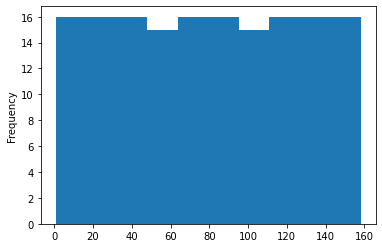

In [17]:
hapiness['Hapiness_rank'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

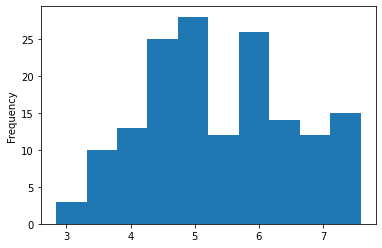

In [18]:
hapiness['Hapiness_Score'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

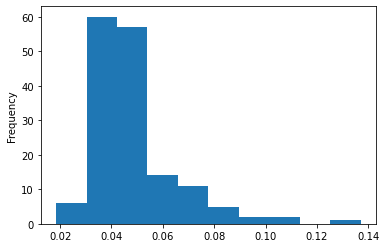

In [19]:
hapiness['Standard Error'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

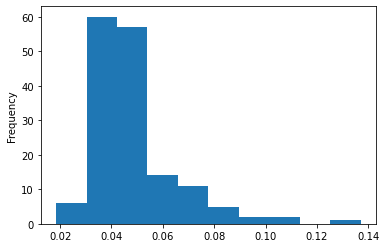

In [20]:
hapiness['Standard Error'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

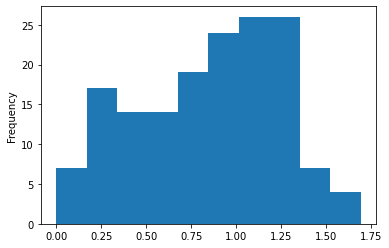

In [22]:
hapiness['Economy'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

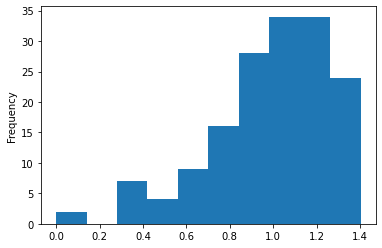

In [23]:
hapiness['Family'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

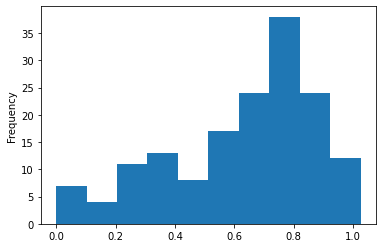

In [24]:
hapiness['Health'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

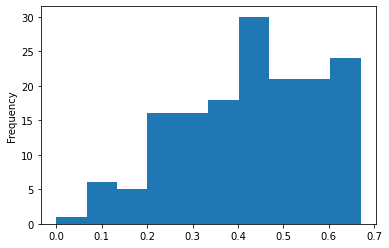

In [25]:
hapiness['Freedom'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

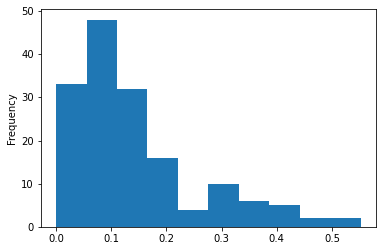

In [26]:
hapiness['Trust'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

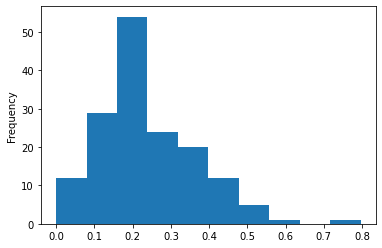

In [27]:
hapiness['Generosity'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

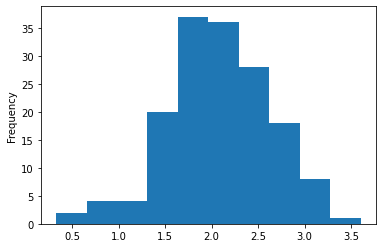

In [28]:
hapiness['Dystopia'].plot.hist()

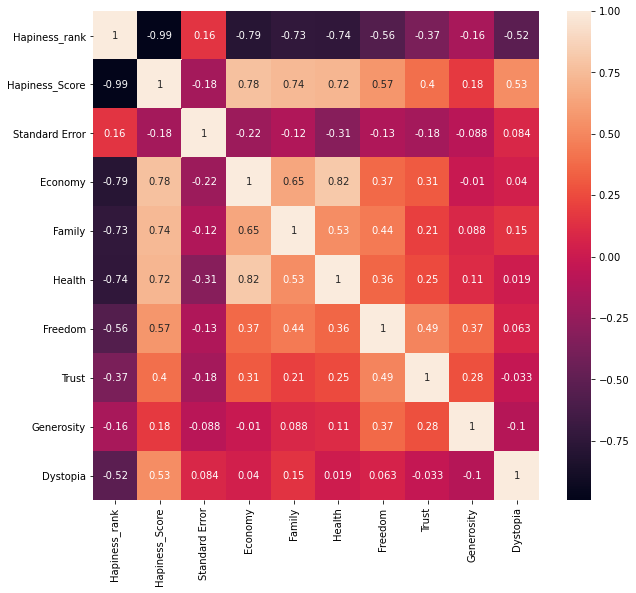

In [31]:
corr_hmap=hapiness.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [ ]:
#above the graph and model do the benchmark of the countries 